In [1]:
import TRS

In [27]:
import sys
sys.path.insert(0, '/Users/bprinoth/Documents/GitHub/tayph/')
import tayph.system_parameters as sp
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from corner import corner
import matplotlib.patheffects as PathEffects
#plt.rcParams.update({'font.size': 16})
plt.rc('font', size=12)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["xtick.minor.size"] = 3.5
plt.rcParams["ytick.minor.size"] = 3.5
#print(plt.rcParams.keys())
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 1

In [3]:
# #datapath = '/Users/bprinoth/mnt/mantis/data/bibi/Papers/TRS/postprocess/FeI_3000/'

# CCF = fits.getdata(datapath+'CCF_stacked.fits')
# np.save('test/CCF.npy', CCF)

# RV = fits.getdata(datapath+'RV.fits')
# np.save('test/RV.npy', RV)

# phases = sp.phase('/Users/bprinoth/mnt/mantis/data/bibi/Papers/TRS/data/2022-06-02_blue/') 
# phases[phases>0.5] -= 1.
# np.save('test/phases.npy', phases)

# transit = sp.transit('/Users/bprinoth/mnt/mantis/data/bibi/Papers/TRS/data/2022-06-02_blue/')
# np.save('test/transit.npy', transit)

inclination = 84.58 #sp.paramget('inclination', '/Users/bprinoth/mnt/mantis/data/bibi/Papers/TRS/data/2022-06-02_blue/')

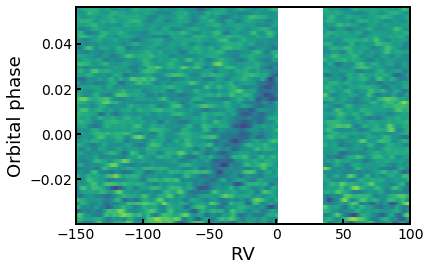

In [4]:
CCF = np.load('test/CCF.npy')
RV = np.load('test/RV.npy')
phases = np.load('test/phases.npy')
transit = np.load('test/transit.npy')

plt.figure()
plt.pcolormesh(RV, phases, CCF)
plt.xlim(-150, 100)
plt.xlabel('RV')
plt.ylabel('Orbital phase')
plt.show()

In [5]:
phase_start = phases[transit!=1][0]
phase_end = phases[transit!=1][-1]

print(phase_start, phase_end)

-0.03298198047348 0.03393056772338565


In [6]:
arviz_result, arr = TRS.fit_trace(
    RV=RV,
    phases=phases,
    CCF=CCF, 
    phase_start=phase_start,
    phase_end=phase_end, 
    inclination=inclination,
    transit=transit
)

2.0553661513168224


  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

(7, 20, 600)


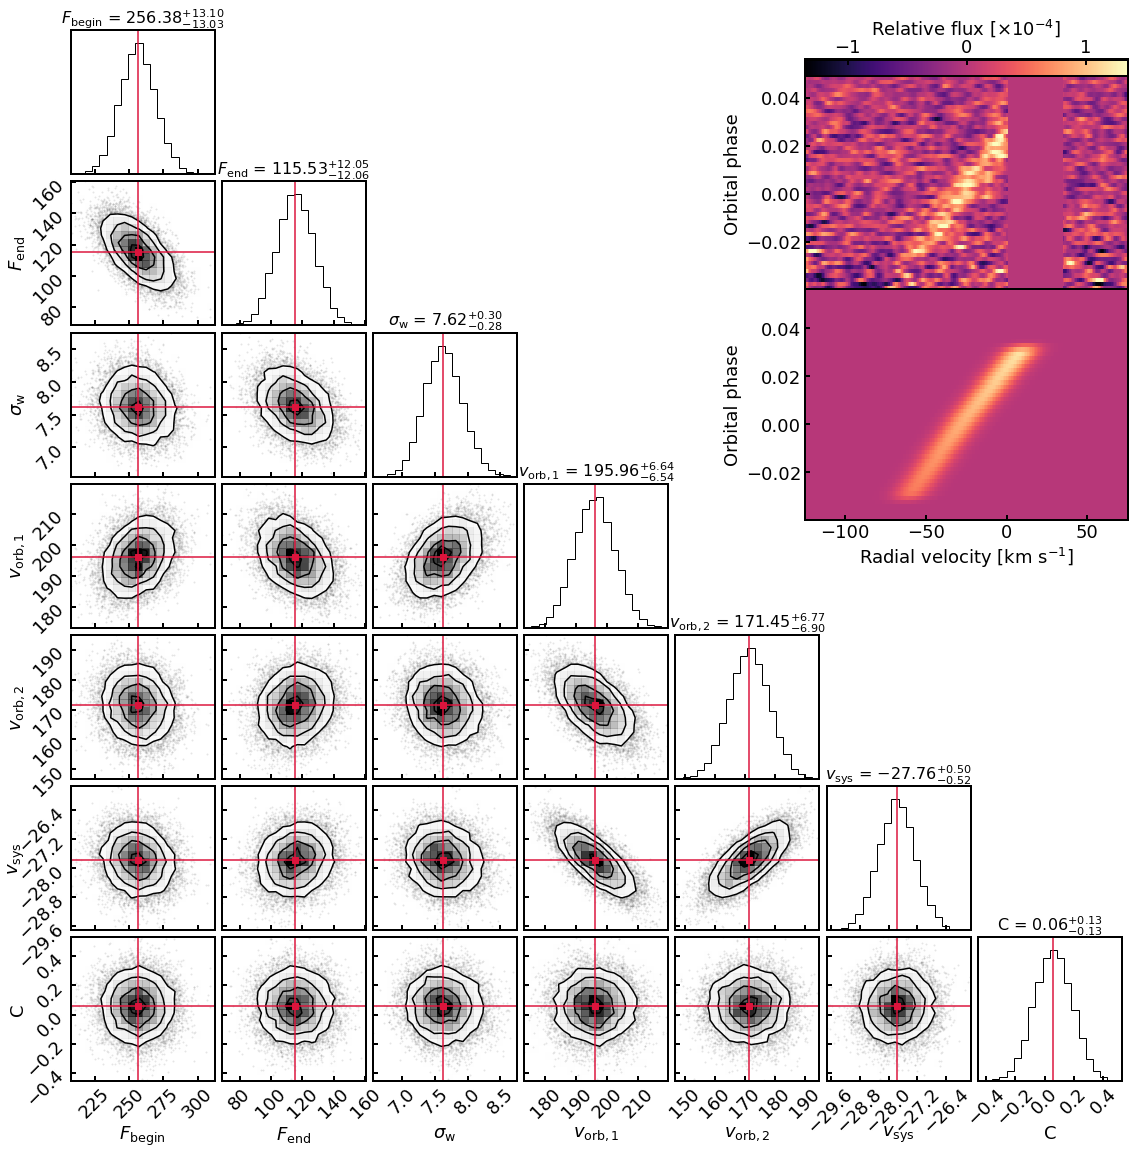

In [50]:
np.save(f'test/trace_posteriors.npy', arr)
xlims = (-125,75)
scaling = 4
print(arr.shape)

medians = np.median(arr, axis=(1,2))
stds = np.std(arr, axis=(1,2))


fig = corner(
    arr.T, 
    quiet=True,
    labels=varnames,
    truths = medians,
    show_titles=True,
    truth_color='crimson',
    title_kwargs={"fontsize": 16},
)

# set NaNs in CCF to 0 so the plot looks a bit nicer ;)
CCF_binned_with_NaNs = CCF * 1e4
CCF_binned_with_NaNs[np.isnan(CCF_binned_with_NaNs)] = 0.0


vmin = np.nanmean(CCF_binned_with_NaNs)-scaling*np.nanstd(CCF_binned_with_NaNs)
vmax = np.nanmean(CCF_binned_with_NaNs)+scaling*np.nanstd(CCF_binned_with_NaNs)


left, bottom, width, height = [0.70, 0.75, 0.28, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
im=ax2.pcolormesh(RV,phases,-CCF_binned_with_NaNs, cmap='magma', shading='auto',vmin=vmin,vmax=vmax,linewidth=0,rasterized=True) # binned CCF with NaNs

ax2.set_xlim(xlims)
ax2.set_ylabel('Orbital phase')
ax2.set_xticks([])

cbax = fig.add_axes([0.70, 0.85, 0.28, 0.1])
cbax.axis('off')
cbar = plt.colorbar(im, ax=cbax, location='top')

cbar.ax.set_xlabel(r'Relative flux [$\times 10^{-4}$]', rotation='horizontal')

cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left') 
params = [medians[i] for i in range(len(medians))]
left, bottom, width, height = [0.70, 0.55, 0.28, 0.2]
ax3 = fig.add_axes([left, bottom, width, height])

RV2D = np.tile(RV, len(phases))
RV2D = np.reshape(RV2D, (len(phases), len(RV)))

model = TRS.model(
                  params=params,
                  x=RV2D,
                  phases=phases,
                  transit=transit,
                  phase_start=phase_start,
                  phase_end=phase_end,
                  inclination=inclination
)
ax3.pcolormesh(RV,phases, model*1e4, cmap='magma', shading='auto',vmin=vmin,vmax=vmax,linewidth=0,rasterized=True)

ax3.set_xlabel(r'Radial velocity [km s$^{-1}$]')
ax3.set_xlim(xlims)
ax3.set_ylabel('Orbital phase')





fig.patch.set_facecolor('white')

#np.save(f'plots/trace_posteriors_{species}.npy', arviz_result['posterior'])


In [12]:
model = TRS.model(
                  params=params,
                  x=RV2D,
                  phases=phases,
                  transit=transit,
                  phase_start=phase_start,
                  phase_end=phase_end,
                  inclination=inclination
)

(-150, 100)

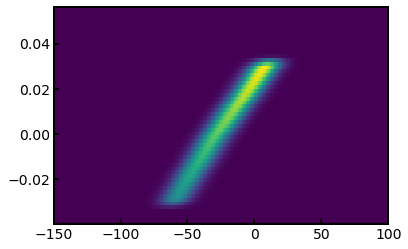

In [13]:
plt.pcolormesh(RV, phases, model)
plt.xlim(-150, 100)